# Geração de dataset para o problema de trasnporte 1D de fluidos bifásicos em meios porosos.

## Introdução
> O problema em questão é o modelo padrão de Buckley-Leverett, com dois fluidos incompressíveis e imiscíveis. Considerando que os fluidos são $o$ e $w$, a permeabilidade e a porosidade do meio são as funções $k(x)$ e $\phi(x)$, respectivamente, e são desprezíveis os efeitos de gravidade e capilaridade, a pressão $p$ e a saturação dos fluidos $S_w(x,t)$ e $S_o(x,t)$ são dados por um sistema combinando as equações de balanço de massa e a equação de Darcy para cada fase (Fuks e Tchelepi, 2020). A equação abaixo modela esse problema em uma dimensão:
$$\phi(x)\dfrac{\partial S_w}{\partial t} + u_{tot}\dfrac{\partial f_w(S_w)}{\partial x}=0$$.

> Na equação acima, $u_{tot}=u_w+u_o$ é a soma dos fluxos de Darcy de cada fase, e $f_w(S_w)$ é o fluxo fracional de água:
$$f_w = \dfrac{\lambda_w}{\lambda_w + \lambda_o}$$,

> Em que $\lambda_\alpha=(k\cdot k_{rw})/\mu_\alpha$ é a mobilidade de cada fase ($\alpha=o,\;w$), com $\mu_\alpha$ sendo a viscosidade da fase, e $k_{rw}(S_w)$ sendo a permeabilidade relativa de cada fase.

> Para esse problema, as equções iniciais e de fronteira são:
$$S_w(x,t)=s_{wi},\;\forall x,\; t=0\\ S_w(x,t)=s_b,\; x=0,\;t>0$$.

> Utilizando-se das variáveis adimensionais $t=[\int_0^t (u_{tot}dt')]/(\phi L)$ e $x_D=x/L$, a equação do problema e suas condições podem ser reescritas como:
$$\dfrac{\partial S_w}{\partial t_D} + \dfrac{\partial f(S_w)}{\partial x_d}=0\\
S_w(x_D,t_D)=s_{wi},\;\forall x_D,\; t_D0\\ S_w(x_D,t_D)=s_b,\; x_D=0,\;t_D>0$$

> E resolver a equação acima é equivlente a resolver essa PDE hiperbólica:
$$\dfrac{\partial u}{\partial t} + \dfrac{\partial f(u)}{\partial x}=0\\
u(x,t=0)=u_0(x)\\ u(x=0,t)=u_b(t)$$.

> Neste trabalho, são assumidas a condição inicial e de fronteira uniformes:
$$u(x,t=0)=0\\ u(x=0,t>0)=1$$.


## Caso Côncavo - solução numérica
> O caso côncavo da solução para essa PDE ocorre quando a permeabilidade relativa das fases $k_{r\alpha}(S_\alpha)$ é uma função linear da saturação, com a função de fluxo podendo ser reescrita como:
$$f_w(S_w)=\dfrac{S_w}{S_w + S_o\dfrac{\mu_w}{\mu_o}}$$,
Sendo $S_o = 1-S_w$ e $M=\mu_o/\mu_w$, a função $f(u)$ do problema se torna:
$$f(u) = \dfrac{u}{u + \dfrac{1-u}{M}}$$.

> Substituindo essa forma de $f(u)$ na PDE, obtém-se:
$$\dfrac{\partial u}{\partial t} + \dfrac{\partial}{\partial x}\left(\dfrac{u}{u + \dfrac{1-u}{M}}\right)=0$$.

> Com alguma manipulação algébrica, obtém-se:
$$u_t + \dfrac{M}{\left[1 + (M-1)u\right]^2}\cdot u_x = 0$$.

> Esse problema de valor inicial e de contorno pode ser facilmente resolvido com o método de diferenças finitas regressivo:
$$u_x(x_i,t)\approx\dfrac{u_i-u_{i-1}}{\Delta x}\Rightarrow u_t(x_i) \approx \dfrac{-M}{\left[1 + (M-1)u_i\right]^2}\cdot\dfrac{u_i-u_{i-1}}{\Delta x}$$

> Com a integração de Euler, pode-se então fazer:
$$u(x_i,t)\approx u(x_i,t-\Delta t) + \Delta t\cdot\dfrac{-M}{\left[1 + (M-1)u_i\right]^2}\cdot\dfrac{u_i-u_{i-1}}{\Delta x}$$

## Caso não-convexo sem termo difusivo - Solução numérica
> Para o caso não-convexo da solução, é assumido que a permeabilidade relativa segue uma lei de potência em função da saturação, mais especificamente, segue uma relação quadrática. Dessa forma, a função $f(u)$ pode ser reescrita assim:
$$f(u) = \dfrac{u^2}{u^2 + \dfrac{(1-u)^2}{M}}$$.

> E a nova PDE é:
$$u_t + \dfrac{2Mu(1-u)}{\left[(M+1)u^2 -2u +1\right]^2}\cdot u_x = 0$$.

$$\dfrac{\partial u}{\partial t} = \dfrac{-2Mu(1-u)}{\left[(M+1)u^2 -2u +1\right]^2}\cdot \dfrac{\partial u}{\partial x}$$

> Ainda utilizando o método de diferenças finitas regressivo e integração de Euler, obtém-se:
$$u(x_i,t)\approx u(x_i,t-\Delta t) + \Delta t\cdot\dfrac{-2Mu(1-u)}{\left[(M+1)u^2 -2u +1\right]^2}\cdot\dfrac{u_i-u_{i-1}}{\Delta x}$$

> A PDE do problema, sem o termo difusivo, é:
$$\dfrac{\partial u}{\partial t} + \dfrac{\partial f(u)}{\partial x}=0$$

> A função de fluxo no caso não-convexo é:
$$f(u) = \dfrac{u^2}{u^2 + \dfrac{(1-u)^2}{M}}$$

> Substituindo e fazendo a diferenciação da função de fluxo, temos:
$$\dfrac{\partial u}{\partial t} + \dfrac{2Mu(1-u)}{\left[(M+1)u^2 -2u +1\right]^2}\cdot \dfrac{\partial u}{\partial x} = 0$$

> Logo, a derivada temporal de $u$, será:
$$\dfrac{\partial u}{\partial t} = \dfrac{-2Mu(1-u)}{\left[(M+1)u^2 -2u +1\right]^2}\cdot \dfrac{\partial u}{\partial x}$$

In [52]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib as mpl
from matplotlib.lines import Line2D
from IPython.display import clear_output

In [4]:
mpl.rcParams['font.family'] = 'arial'
mpl.rc('font', size=9)

In [78]:
def skipp(lista, nn):
    ll = []
    for ii in range(0, len(lista), int(nn)):
        ll.append(ii)
    return np.array(ll)

In [79]:
print(skipp(t, 100))

[   0  100  200  300  400  500  600  700  800  900 1000 1100 1200 1300
 1400 1500 1600 1700 1800 1900 2000 2100 2200 2300 2400 2500 2600 2700
 2800 2900 3000 3100 3200 3300 3400 3500 3600 3700 3800 3900 4000 4100
 4200 4300 4400 4500 4600 4700 4800 4900 5000 5100 5200 5300 5400 5500
 5600 5700 5800 5900 6000 6100 6200 6300 6400 6500 6600 6700 6800 6900
 7000 7100 7200 7300 7400 7500 7600 7700 7800 7900 8000 8100 8200 8300
 8400 8500 8600 8700 8800 8900 9000 9100 9200 9300 9400 9500 9600 9700
 9800 9900]


In [18]:
# Solucao analitica
def u_an(xx, tt, cc):
    global M
    if cc=='ccv':
        return (np.sqrt(M*tt/xx)-1)/(M-1)*(xx/tt<=M)*(xx/tt>=1/M) + 1*(xx/tt<=1/M)
    elif cc=='ncvx1':
        return 0
    else:
        return 0

# Diferencas finitas
def utt(uu, du, cc):
    global M
    if cc=='ccv':
        return (-M/(1 + (M-1)*uu)**2)*du
    elif cc=='ncvx1':
        return (-2*M*(uu+1e-5)*(1-uu)/((M+1)*uu**2 -2*uu +1)**2)*du
    else:
        return 0

# # Volumes finitos
# def utt(uu, du, cc):
#     global M
#     if cc=='ccv':
#         return (-M/(1 + (M-1)*uu)**2)*du
#     elif cc=='ncvx1':
#         return (-2*M*(uu+1e-5)*(1-uu)/((M+1)*uu**2 -2*uu +1)**2)*du
#     else:
#         return 0

In [ ]:
## Solucoes
# Parametros do MDF
nt = 1e5                    # numero de snapshots
dt = 1/nt                   # passo temporal
t = np.linspace(0, 1, int(nt))     # vetor tempo
nx = 400                   # numero de nos
dx = 1/nx                  # passo espacial
x = np.linspace(0, 1, int(nx))     # espaço discretizado

# Parametros problema
u0 = np.zeros(x.shape)
u_x0 = 1
M = 2
caso = 'ccv'

# Solucao por MDF
uk1 = u0
uk1[0] = u_x0
u = np.array([uk1])
for k in range(1, int(nt)):
    if (100*k/nt)%5 == 0:
        clear_output(wait=True)
        print(str(int(100*k/nt))+'%')
    uk = np.array([u_x0])
    for i in range(1, int(nx)):
        ux = (uk1[i]-uk1[i-1])/(dx)
        ut = utt(uk1[i], ux, caso)
        ui = uk1[i] + ut*dt
        uk = np.append(uk, ui)
    uk1 = uk
    u = np.append(u, [uk], axis=0)

# Solucao analitica
sw_an = np.array([u0])
for t1 in t[1:]:
    sw_an_k = u_an(x[1:], t1, 'ccv')
    sw_an_k = np.append(1, sw_an_k)
    sw_an = np.append(sw_an, [sw_an_k], axis=0)

sw = u
so = 1-u

# solucoes: matriz com snapshots de sw ou so (em funcao de x) para cada instante do vetor tempo

75%


<IPython.core.display.Javascript object>


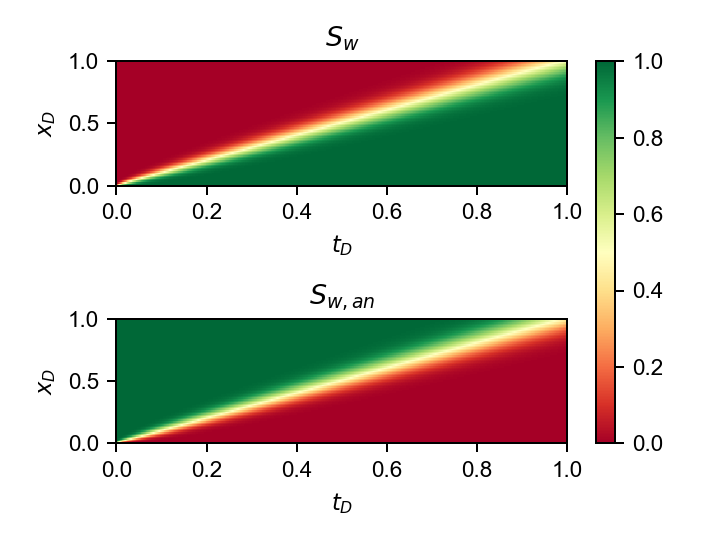

In [36]:
# Plot 2D estatico
fig1, ax1 = plt.subplots(2, 1, figsize=(4, 3), dpi=180)
norm = mpl.colors.Normalize(min(np.min(so), np.min(sw)), max(np.max(sw), np.max(so)))
c = ax1[0].pcolor(t, x, sw.T, cmap='RdYlGn', norm=norm)
ax1[1].pcolor(t, x, so.T, cmap='RdYlGn', norm=norm)

# Ajustes do plot
ax1[0].set_title('$S_w$')
ax1[1].set_title('$S_{w,an}$')

# Legenda e eixos
for i in range(2):
    ax1[i].set_ylabel('$x_D$')
    ax1[i].set_xlabel('$t_D$')
    ax1[i].set_ylim(0, 1)
    ax1[i].set_xlim(0, 1)
fig1.tight_layout()
fig1.colorbar(c, ax=ax1)


<IPython.core.display.Javascript object>


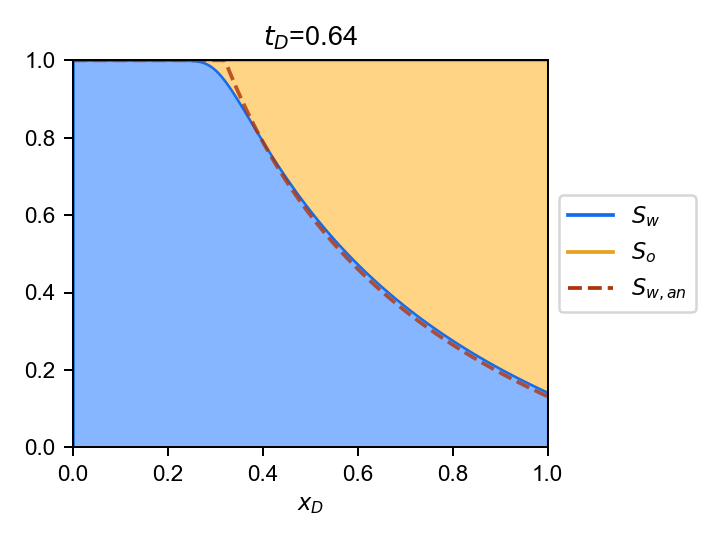

In [81]:
# Animacao
saves = np.array([0.25, 0.5, 0.75])
fig2, ax2 = plt.subplots(figsize=(4, 3), dpi=180)
ax2.set_xlim(0, 1)
ax2.set_ylim(0, 1)
box = ax2.get_position()
ax2.set_position([box.x0, box.y0, box.width * 0.8, box.height])

def anifunc(frame):
    global x, sw, so, dt, saves
    # Plot
    ax2.clear()
    ax2.fill_between(x, sw[frame]+so[frame], sw[frame], ec='#e6a122', fc='#ffd485')
    ax2.fill_between(x, sw[frame], ec='#156ced', fc='#85b6ff')
    ax2.plot(x, sw_an[frame], c='#b0340b', ls='--', alpha=0.8)
    
    # Ajustes do plot
    ax2.set_xlim(0, 1)
    ax2.set_ylim(0, 1)
    ax2.set_xlabel('$x_D$')
    ax2.set_title('$t_D$={t:.2f}'.format(t=frame/nt))
    
    # Legenda
    legenda = [Line2D([0], [0], color='#156ced', label='$S_w$'),
               Line2D([0], [0], color='#e6a122', label='$S_o$'),
               Line2D([0], [0], color='#b0340b', ls='--', label='$S_{w,an}$')]
    ax2.legend(handles=legenda, loc='center left', bbox_to_anchor=(1, 0.5))
    fig2.tight_layout()
    if frame in saves*nt:
        fig2.savefig('frame'+str(int(frame*100/nt))+'.png')
    return []


ani = FuncAnimation(fig2, anifunc, frames=skipp(t, 100), interval=17)